In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout

In [326]:
data = pd.read_csv("/content/drive/MyDrive/DL exp/exp 02/customers.csv")

In [327]:
df = data.copy()

In [328]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [329]:
df.isnull().columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<Axes: ylabel='Count'>

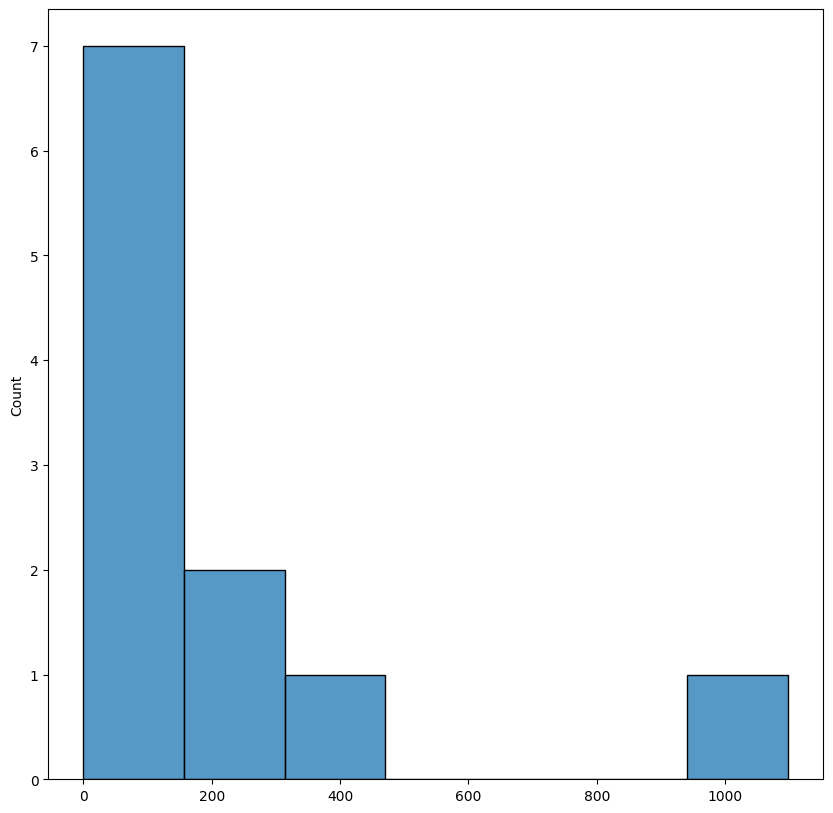

In [330]:
plt.figure(figsize=(10,10))
sns.histplot(df.isnull().sum())

In [331]:
target = df[['Segmentation']].values

In [332]:
df = df.drop('Segmentation',axis=1)

In [333]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64

In [334]:
R = OrdinalEncoder()

In [335]:
columns_unique = df.select_dtypes(include=['object'])

In [336]:
columns_unique.columns
cat_cols = []
for i in columns_unique.columns:
  cat_cols.append(i)

In [337]:
cat_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [338]:
df[cat_cols] = R.fit_transform(df[cat_cols])

In [339]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1.0,0.0,22,0.0,5.0,1.0,2.0,4.0,3.0
1,462643,0.0,1.0,38,1.0,2.0,NaN,0.0,3.0,3.0
2,466315,0.0,1.0,67,1.0,2.0,1.0,2.0,1.0,5.0
3,461735,1.0,1.0,67,1.0,7.0,0.0,1.0,2.0,5.0
4,462669,0.0,1.0,40,1.0,3.0,NaN,1.0,6.0,5.0


In [340]:
df.fillna(df.mean(), inplace = True)

In [341]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [342]:
type(target)

numpy.ndarray

In [343]:
O = OneHotEncoder()
target = O.fit_transform(target).toarray()

In [344]:
df.shape

(10695, 10)

In [345]:
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=0.3, random_state = 49)

In [411]:
M = MinMaxScaler()
X_train = M.fit_transform(X_train)
X_test = M.fit(X_test)

In [347]:
X_train.shape

(7486, 10)

In [380]:
model = Sequential()

In [381]:
model.add(Dense(10,activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [382]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 18)                198       
                                                                 
 dense_49 (Dense)            (None, 9)                 171       
                                                                 
 dense_50 (Dense)            (None, 4)                 40        
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [383]:
model.compile('adam',loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [384]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
234/234 [==============================] - 2s 5ms/step - loss: 1.3378 - accuracy: 0.3617 - val_loss: 1.3003 - val_accuracy: 0.4089
Epoch 2/200
234/234 [==============================] - 1s 4ms/step - loss: 1.2700 - accuracy: 0.4275 - val_loss: 1.2556 - val_accuracy: 0.4285
Epoch 3/200
234/234 [==============================] - 1s 4ms/step - loss: 1.2392 - accuracy: 0.4467 - val_loss: 1.2335 - val_accuracy: 0.4425
Epoch 4/200
234/234 [==============================] - 1s 4ms/step - loss: 1.2230 - accuracy: 0.4515 - val_loss: 1.2221 - val_accuracy: 0.4466
Epoch 5/200
234/234 [==============================] - 1s 6ms/step - loss: 1.2143 - accuracy: 0.4578 - val_loss: 1.2139 - val_accuracy: 0.4562
Epoch 6/200
234/234 [==============================] - 1s 5ms/step - loss: 1.2095 - accuracy: 0.4587 - val_loss: 1.2083 - val_accuracy: 0.4618
Epoch 7/200
234/234 [==============================] - 1s 4ms/step - loss: 1.2052 - accuracy: 0.4601 - val_loss: 1.2061 - val_accuracy: 0.4615

In [386]:
type(X_test)

numpy.ndarray

In [387]:
metrics = pd.DataFrame(model.history.history)

In [388]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.337756,0.361742,1.300257,0.408850
1,1.270007,0.427465,1.255590,0.428482
2,1.239230,0.446701,1.233527,0.442505
3,1.223001,0.451509,1.222072,0.446557
4,1.214344,0.457788,1.213936,0.456217


<Axes: >

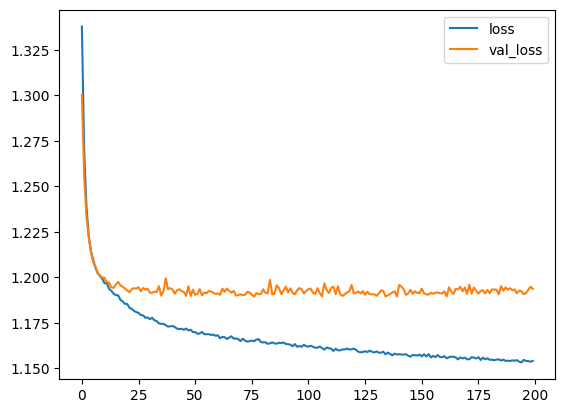

In [390]:
metrics[['loss','val_loss']].plot()

In [391]:
x_test_predictions = np.argmax(model.predict(X_test), axis=1)


101/101 [==============================] - 0s 1ms/step


In [392]:
x_test_predictions.shape


(3209,)

In [393]:
y_test_truevalue = np.argmax(y_test,axis=1)


In [394]:
y_test_truevalue.shape


(3209,)

In [395]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))


[[334 207 115 205]
 [161 243 210 100]
 [ 91 181 363 106]
 [179  83  46 585]]


In [396]:
print(classification_report(y_test_truevalue,x_test_predictions))


              precision    recall  f1-score   support

           0       0.44      0.39      0.41       861
           1       0.34      0.34      0.34       714
           2       0.49      0.49      0.49       741
           3       0.59      0.66      0.62       893

    accuracy                           0.48      3209
   macro avg       0.46      0.47      0.47      3209
weighted avg       0.47      0.48      0.47      3209



In [398]:
model.save('customer_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [400]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train,y_train,X_test,y_test,cat_cols,df,O,L], fh)

In [403]:
ai_brain = load_model('customer_classification_model.h5')

In [405]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train,y_train,X_test,y_test,cat_cols,df,O,L] = pickle.load(fh)

In [406]:
x_single_prediction = np.argmax(model.predict(X_test[1:2,:]), axis=1)


1/1 [==============================] - 0s 97ms/step


In [407]:
print(x_single_prediction)


[3]


In [410]:
print(L.inverse_transform(x_single_prediction))

['D']
